# Good time to go into Movie industry?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cd Data/

/Users/murielkosaka/Desktop/Movie-industry-analysis/data


# Importing CSV Files

In [3]:
#IMPORTING ALL CSV FILES PROVIDED!
movie_gross = pd.read_csv('bom.movie_gross.csv')
# name_basics = pd.read_csv('imdb.name.basics.csv')
# title_akas = pd.read_csv('imdb.title.akas.csv')
# title_basis = pd.read_csv('imdb.title.basics.csv')
# title_crew = pd.read_csv('imdb.title.crew.csv')
# title_principals = pd.read_csv('imdb.title.principals.csv')
# title_ratings = pd.read_csv('imdb.title.ratings.csv')
tmdb_movies = pd.read_csv('tmdb.movies.csv')
movie_budgets = pd.read_csv('tn.movie_budgets.csv')

# Merging Tables

In [4]:
merged = movie_gross.merge(tmdb_movies, on = 'title')

In [5]:
movie_budgets.rename(columns={'movie':'title'}, inplace = True)

In [6]:
movie_budgets[movie_budgets['season_release']=='Holiday']

KeyError: 'season_release'

In [8]:
movie_budgets['season_release'] = movie_budgets.release_date.map(lambda x: x[0:3])

# Pulling out Year Release 

In [9]:
mon_seasons = {'Jan':'Winter', 'Feb':'Winter', 'Mar':'Spring', 'Apr':'Spring', 'May':'Summer','Jun':'Summer','Jul':'Summer','Aug':'Summer','Sep':'Fall','Oct':'Fall','Nov':'Holiday','Dec':'Holiday'}
movie_budgets.replace({'season_release':mon_seasons}, inplace = True)

In [10]:
movie_budgets['year_release'] = movie_budgets.release_date.map(lambda x: int(x[-4:]))

In [11]:
movie_budgets['year_release'].shape

(5782,)

In [12]:
movie_budgets[movie_budgets['season_release']=='Holiday'].head(2)

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,season_release,year_release
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Holiday,2009
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Holiday,2017


In [13]:
movie_budgets['worldwide_gross'] = movie_budgets.worldwide_gross.map(lambda x: int(x[1:].replace(',','')))

In [14]:
movie_budgets[movie_budgets['year_release']>2000].groupby(['year_release']).worldwide_gross.sum()

year_release
2001    14655289257
2002    16427271357
2003    16501552016
2004    18385309570
2005    17591541193
2006    18626047430
2007    19011887229
2008    21530275592
2009    23994243179
2010    24231912708
2011    24675265419
2012    27183123906
2013    26359757029
2014    25273926856
2015    27800988606
2016    28768152741
2017    28429629005
2018    26094444899
2019     6676825346
2020              0
Name: worldwide_gross, dtype: int64

Text(0, 0.5, 'Worldwide Gross (Per Billion)')

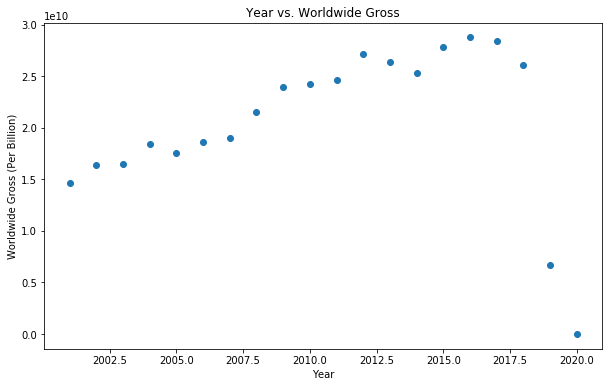

In [15]:
#HOW IS THE MOVIE INDUSTRY DOING PROFIT WISE?
figure,ax = plt.subplots(figsize = (10,6))
y = movie_budgets[movie_budgets['year_release']>2000].groupby(['year_release']).worldwide_gross.sum()
x = y.index
ax.scatter(x,y)
ax.set_title('Year vs. Worldwide Gross')
ax.set_xlabel('Year')
ax.set_ylabel('Worldwide Gross (Per Billion)')